In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [154]:
train = pd.read_csv(r'train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [155]:
test= pd.read_csv(r'test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# EDA

In [156]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [157]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [158]:
len(train['User_ID'].unique())

5891

In [159]:
# Dropping User Id and Product ID columns as they are just identifiers which have no relevance to our dependant variable
train.drop(['User_ID','Product_ID'],axis=1,inplace=True)
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [160]:
for feature in train.columns:
    print(f"{feature} has {len(train[feature].unique())} values")

Gender has 2 values
Age has 7 values
Occupation has 21 values
City_Category has 3 values
Stay_In_Current_City_Years has 5 values
Marital_Status has 2 values
Product_Category_1 has 20 values
Product_Category_2 has 18 values
Product_Category_3 has 16 values
Purchase has 18105 values


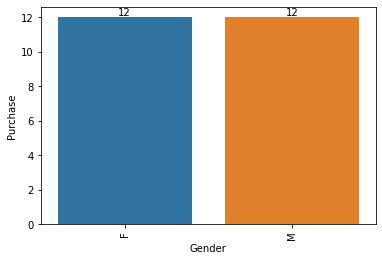

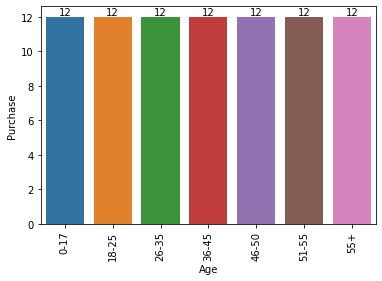

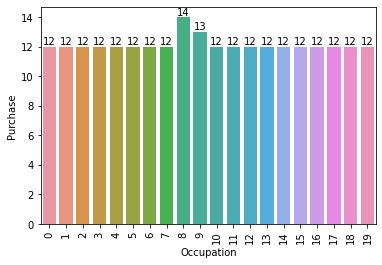

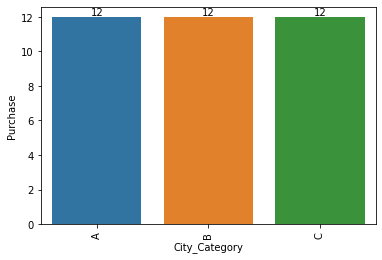

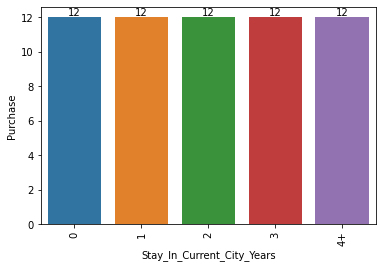

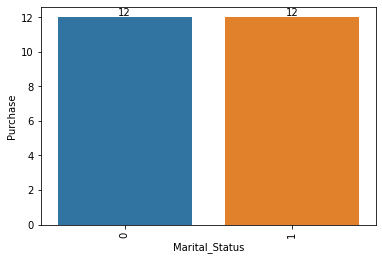

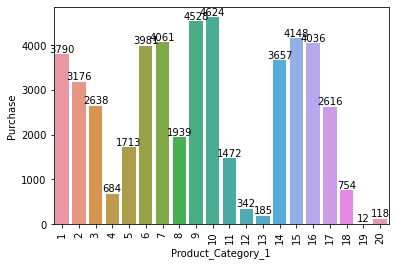

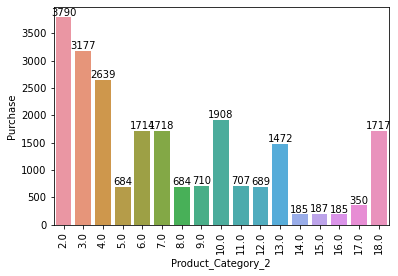

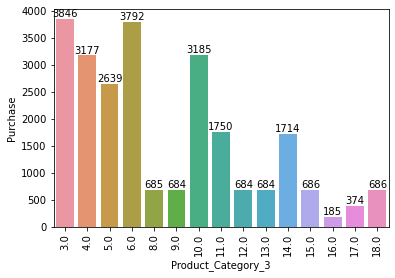

In [161]:
for cat in test.columns:
    if len(train[cat].value_counts())>20:
        cat_num = pd.pivot_table(train,index=[cat],values='Purchase',aggfunc='min').sort_values('Purchase',ascending=False).iloc[:20]
    else:
        cat_num = pd.pivot_table(train,index=[cat],values='Purchase',aggfunc='min').sort_values('Purchase',ascending=False)
    ax = sns.barplot(x=cat_num.index, y=cat_num['Purchase'])
    plt.xticks(rotation=90)
    plt.tick_params(bottom=True, left=True)
    ax.bar_label(ax.containers[0])
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

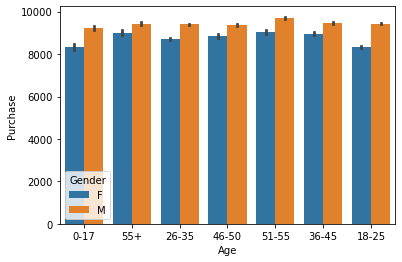

In [162]:
sns.barplot(data = train, x = "Age", y = "Purchase", hue = "Gender",estimator=np.mean)

It is seen, generally males spend more than females across all ages

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

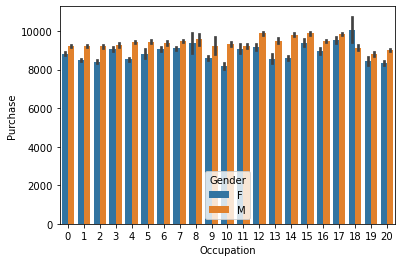

In [163]:
sns.barplot(data = train, x = "Occupation", y = "Purchase", hue = "Gender",estimator=np.mean)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

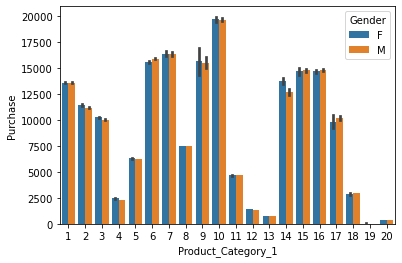

In [164]:
sns.barplot(data = train, x = "Product_Category_1", y = "Purchase", hue = "Gender",estimator=np.mean)

There is definitely a preference towards specific categories in Product_Category_1 among both males and females

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

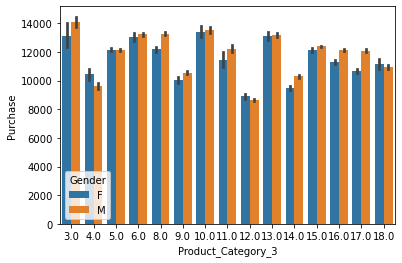

In [165]:
sns.barplot(data = train, x = "Product_Category_3", y = "Purchase", hue = "Gender",estimator=np.mean)

No Particular affinity is seen towards any category in Product_Category_3

# Missing Value Dealing

Product_category_2 and product_category_3 have large number of missing values so cant use Mode imputation otherwise will introduce large bias. So we can either drop them or replace the nans with a new class called "Missing".

Checking the importance of the two columns with a Linear Regression Model

In [166]:
missing_percent = {}

for feature in train.columns:
    missing_percent[feature] = (train[feature].isnull().sum()/len(train)) * 100
    
missing_cat = pd.DataFrame(list(missing_percent.items()))
missing_cat.columns = ['Feature','Percentage of nans']
missing_cat = missing_cat[missing_cat['Percentage of nans']>0]  #filtering out those categorical variables which have 0 nans
missing_cat

,Feature,Percentage of nans
7,Product_Category_2,31.566643
8,Product_Category_3,69.672659


In [167]:
X = train.iloc[:10000].loc[:,~train.columns.isin(['Product_Category_2','Product_Category_3','Purchase'])]
y = train.iloc[:10000].loc[:,'Purchase']

In [168]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,F,0-17,10,A,2,0,3
1,F,0-17,10,A,2,0,1
2,F,0-17,10,A,2,0,12
3,F,0-17,10,A,2,0,12
4,M,55+,16,C,4+,0,8


In [169]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(pd.get_dummies(X), y)

LinearRegression()

In [170]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y, lin_reg.predict(pd.get_dummies(X)))
mse = metrics.mean_squared_error(y, lin_reg.predict(pd.get_dummies(X)))
r2 = metrics.r2_score(y, lin_reg.predict(pd.get_dummies(X)))

print(f"MAE is {mae}, MSE is {mse} and r2 is {r2}")

MAE is 3522.3594004461847, MSE is 21150008.630638376 and r2 is 0.11235411943814044


In [171]:
X2 = train.iloc[:10000].loc[:,~train.columns.isin(['Purchase'])].fillna('Missing')
y2 = train.iloc[:10000].loc[:,'Purchase']

In [172]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(pd.get_dummies(X2), y2)

LinearRegression()

In [173]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y2, lin_reg.predict(pd.get_dummies(X2)))
mse = metrics.mean_squared_error(y2, lin_reg.predict(pd.get_dummies(X2)))
r2 = metrics.r2_score(y2, lin_reg.predict(pd.get_dummies(X2)))

print(f"MAE is {mae}, MSE is {mse} and r2 is {r2}")

MAE is 3267.8246841081573, MSE is 18495595.764631346 and r2 is 0.22375731964337942


We can see that the presence of these two features is not really improving performance much hence, we can directly drop the Product_category_3 since too many nans. For Product_category_2 we can still evaluate if we want to replace with mode/'Missing'
Let's do mode imputation for this one

In [174]:
train.drop(['Product_Category_3'],axis=1,inplace=True)
test.drop(['Product_Category_3'],axis=1,inplace=True)

In [175]:
train['Product_Category_2'] = train['Product_Category_2'].fillna(train['Product_Category_2'].value_counts(ascending=False).index[0]) 

In [176]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(train['Product_Category_2'].value_counts(ascending=False).index[0]) 

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


# Encoding non-numerical categorical variables

### Using Ordinal Encoding on Gender, Age and Stay_In_Current_Years columns as the categories can be intuitively ranked

In [178]:
categorical_features = ['Gender','Age','Stay_In_Current_City_Years']  # list of all categorical features to be encoded
feature_label_mapping = {'Gender':{'M':0,'F':1}, 'Age':{'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},
                        'Stay_In_Current_City_Years':{'0':0,'1':1,'2':2,'3':3,'4+':4}}   # dictionary which holds the rank mapping for each categorical variable i.e. our transformer which will be used to transform/encode our test/future data in the form {Name:{a1:4,a3:3...ax:0},Pet:{Dog:3,..xyz:0}} 
train_copy = train.copy() #we need a pre-encoded version of the train dataframe as needed during the encoding of test data.
for feature in categorical_features:
    train[feature]=train[feature].map(feature_label_mapping[feature])   #implement the ranking mapping on the feature


train.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,1,10,A,2,0,3,8.0,8370
1,1,1,10,A,2,0,1,6.0,15200
2,1,1,10,A,2,0,12,8.0,1422
3,1,1,10,A,2,0,12,14.0,1057
4,0,7,16,C,4,0,8,8.0,7969


In [179]:
for var in feature_label_mapping.keys():
    feature_label_mapping[var]['New'] = -1


In [180]:
def target_ordinal_encoding(d2):  #feature_label_mapping variable should be accessable to this function as it is the transformer to be used.
    categorical_features = ['Gender','Age','Stay_In_Current_City_Years']
    
    for feature in categorical_features:
        d2[feature] = np.where(d2[feature].isin(list(train_copy[feature].unique())),d2[feature],'New') # we need the pre-encoded values from d1(train) dataframe so createa  copy of the train dataframe before doing it's encoding. This line will mark any new categories in the d2(test/future data) dataframe as "New"
        d2[feature]=d2[feature].map(feature_label_mapping[feature])  # now that we have converted any new feature not present in the train data to "New" we can use our train data's ranking mapping dictionary on our test data
    return d2 

In [181]:
target_ordinal_encoding(test)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,0,5,7,B,2,1,1,11.0
1,0,3,17,C,0,0,3,5.0
2,1,4,1,B,4,1,5,14.0
3,1,4,1,B,4,1,4,9.0
4,1,3,1,C,1,0,4,5.0
...,...,...,...,...,...,...,...,...
233594,1,3,15,B,4,1,8,8.0
233595,1,3,15,B,4,1,5,8.0
233596,1,3,15,B,4,1,1,5.0
233597,1,5,1,C,4,0,10,16.0


### Using One-hot-encoding on City_Category column as ranking is not evident

Train Data

In [182]:
from sklearn.preprocessing import OneHotEncoder
cat_features = ['City_Category']   # list of all non-numerical categorical columns to be encoded. Can do this also by [col for col in df.columns if df[col].dtypes=='O']
encoder = OneHotEncoder(handle_unknown="ignore")
d1_ohe = encoder.fit_transform(train[cat_features]) 
col_names = []  # col_names holds the names of all newly created encoded columns
[col_names.extend(l1) for l1 in [list(arr) for arr in encoder.categories_]]
cat_encoded = pd.DataFrame(d1_ohe.toarray(),columns = col_names)   #dataframe containing the encoded categorical variables
train = pd.concat((train.loc[:,~train.columns.isin(cat_features)], cat_encoded), axis=1)  #final dataframe by joining all variables excluding the ones in cat_features with the one-hot encoded dataframe
train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,A,B,C
0,1,1,10,2,0,3,8.0,8370,1.0,0.0,0.0
1,1,1,10,2,0,1,6.0,15200,1.0,0.0,0.0
2,1,1,10,2,0,12,8.0,1422,1.0,0.0,0.0
3,1,1,10,2,0,12,14.0,1057,1.0,0.0,0.0
4,0,7,16,4,0,8,8.0,7969,0.0,0.0,1.0


Test Data

In [183]:
def one_hot_encoder(d2):
    cat_features = ['City_Category']
    d2_ohe = encoder.transform(d2[cat_features])
    col_names = []
    [col_names.extend(l1) for l1 in [list(arr) for arr in encoder.categories_]]
    cat_encoded = pd.DataFrame(d2_ohe.toarray(),columns = col_names)
    d2_encoded = pd.concat((d2.loc[:,~d2.columns.isin(cat_features)], cat_encoded), axis=1)
    return d2_encoded

In [184]:
test = one_hot_encoder(test)

# Feature Scaling

In [185]:
train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
A                             0
B                             0
C                             0
dtype: int64

In [186]:
test.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
A                             0
B                             0
C                             0
dtype: int64

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temp = scaler.fit_transform(train.drop(['Purchase'],axis=1))


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [190]:
train = pd.concat([train['Purchase'].reset_index(drop=True),
                    pd.DataFrame(temp, columns=train.drop(['Purchase'],axis=1).columns)],
                    axis=1)
train.head()

,Purchase,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,A,B,C
0,8370,1.746513,-1.844248,0.294864,0.109801,-0.833018,-0.610809,-0.293605,1.650370,-0.851422,-0.672143
1,15200,1.746513,-1.844248,0.294864,0.109801,-0.833018,-1.118912,-0.759362,1.650370,-0.851422,-0.672143
2,1422,1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,-0.293605,1.650370,-0.851422,-0.672143
3,1057,1.746513,-1.844248,0.294864,0.109801,-0.833018,1.675656,1.103664,1.650370,-0.851422,-0.672143
4,7969,-0.572570,2.588277,1.214734,1.660861,-0.833018,0.659449,-0.293605,-0.605925,-0.851422,1.487778


In [192]:
test = scaler.transform(test)
test = pd.DataFrame(data=test,columns=train.drop(['Purchase'],axis=1).columns)
test.head()

C:\Users\Atul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,A,B,C
0,-1.900406,-1.762417,-1.263562,-1.356104,1.608072,-1.657225,-2.062309,-1.97307,1.528043,-2.12392
1,-1.900406,-2.853932,-1.028517,-2.558996,-2.526937,-1.528141,-2.387703,-1.97307,-2.576341,2.54134
2,3.477736,-2.308174,-1.404589,-0.153211,1.608072,-1.399056,-1.899612,-1.97307,1.528043,-2.12392
3,3.477736,-2.308174,-1.404589,-0.153211,1.608072,-1.463598,-2.170774,-1.97307,1.528043,-2.12392
4,3.477736,-2.853932,-1.404589,-1.957550,-2.526937,-1.463598,-2.387703,-1.97307,-2.576341,2.54134


# Dataset Prepared for ML models

In [193]:
train.to_csv('cleaed_train.csv')
test.to_csv('cleaned_test.csv')